<a href="https://colab.research.google.com/github/PARKHYOUNJUNG/phj_lms23/blob/main/CODE/PHJ_20days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [pykrx](https://github.com/sharebook-kr/pykrx)
- [네이버증권](https://finance.naver.com/)

In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and dir

In [3]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pykrx import stock
import pandas as pd

In [5]:
# ticker(주식번호) 와 종목명
df_tic = pd.DataFrame({'ticker':[],'tic_name':[]})

for ticker in stock.get_market_ticker_list(date='20230331',market='KOSPI'):
  df_tic.loc[len(df_tic)]=[ticker,stock.get_market_ticker_name(ticker)]

df_tic.tail()

,ticker,tic_name
941,005010,휴스틸
942,000540,흥국화재
943,000547,흥국화재2우B
944,000545,흥국화재우
945,003280,흥아해운


In [14]:
# 네이버 ticker 찾기기
ticker = df_tic[df_tic['tic_name']=='NAVER']['ticker'].values[0]
ticker

'035420'

In [76]:
start_date = "20170401"
end_date = "20230331"
# today = "20230410"
ticker
df = stock.get_market_ohlcv(start_date, end_date, ticker)
# df

In [77]:
len(df)

1475

In [78]:
df=df[df['시가']!=0]
df

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2017-04-03,171243,175849,168839,174848,54884,47808834000,2.11
2017-04-04,173847,174047,169440,170241,59594,51010262154,-2.63
2017-04-05,171643,172044,167237,168839,99674,84156754608,-0.82
2017-04-06,167838,168239,165435,168239,72103,60160689026,-0.36
2017-04-07,167638,168639,165234,165835,57671,47887964654,-1.43
...,...,...,...,...,...,...,...
2023-03-27,201500,202000,198200,199300,611569,121929314900,-1.58
2023-03-28,199600,201000,197800,199500,586388,116774872500,0.10
2023-03-29,198000,201000,198000,199100,442034,87965921900,-0.20


In [58]:
# df=df.reset_index()
# df

In [79]:
df.corr()

,시가,고가,저가,종가,거래량,거래대금,등락률
시가,1.000000,0.999454,0.999553,0.998906,0.312397,0.612240,-0.012167
고가,0.999454,1.000000,0.999459,0.999570,0.323475,0.623415,0.007623
저가,0.999553,0.999459,1.000000,0.999519,0.305308,0.605888,0.003159
종가,0.998906,0.999570,0.999519,1.000000,0.314789,0.615101,0.022871
거래량,0.312397,0.323475,0.305308,0.314789,1.000000,0.839284,0.067898
거래대금,0.612240,0.623415,0.605888,0.615101,0.839284,1.000000,0.082625
등락률,-0.012167,0.007623,0.003159,0.022871,0.067898,0.082625,1.000000


In [80]:
df.describe()

,시가,고가,저가,종가,거래량,거래대금,등락률
count,1472.000000,1472.000000,1472.000000,1472.000000,1.472000e+03,1.472000e+03,1472.000000
mean,225805.935462,228914.713315,222640.608016,225676.722826,5.718723e+05,1.598586e+11,0.034586
std,94785.541029,95924.838719,93462.812224,94599.145608,5.062892e+05,1.374450e+11,2.175005
min,105500.000000,107000.000000,104000.000000,106500.000000,3.120700e+04,1.887580e+10,-8.790000
25%,153017.000000,155015.000000,151164.000000,153017.000000,2.153395e+05,6.357369e+10,-1.270000
50%,182000.000000,184500.000000,179027.000000,181679.000000,4.867355e+05,1.198395e+11,0.000000
75%,296250.000000,301000.000000,291125.000000,297125.000000,7.836042e+05,2.111751e+11,1.142500
max,460000.000000,465000.000000,452000.000000,454000.000000,6.634375e+06,1.136241e+12,13.920000


In [81]:
df['ma5'] = df['종가'].rolling(5).mean()
df['ma20'] = df['종가'].rolling(20).mean()
df['ma100'] = df['종가'].rolling(100).mean()
# df['ma200'] = df['종가'].rolling(200).mean()

In [82]:
df.tail()

,시가,고가,저가,종가,거래량,거래대금,등락률,ma5,ma20,ma100
날짜,,,,,,,,,,
2023-03-27,201500,202000,198200,199300,611569,121929314900,-1.58,202660.0,203130.0,195921.0
2023-03-28,199600,201000,197800,199500,586388,116774872500,0.10,202460.0,202705.0,196176.0
2023-03-29,198000,201000,198000,199100,442034,87965921900,-0.20,200880.0,202235.0,196477.0
2023-03-30,200500,201000,198100,201000,788108,157655600600,0.95,200280.0,201985.0,196747.0
2023-03-31,203500,203500,199100,202000,937726,188788645700,0.50,200180.0,201810.0,197077.0


In [89]:
df.index

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14',
               ...
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='날짜', length=1472, freq=None)

<Axes: xlabel='날짜', ylabel='종가'>

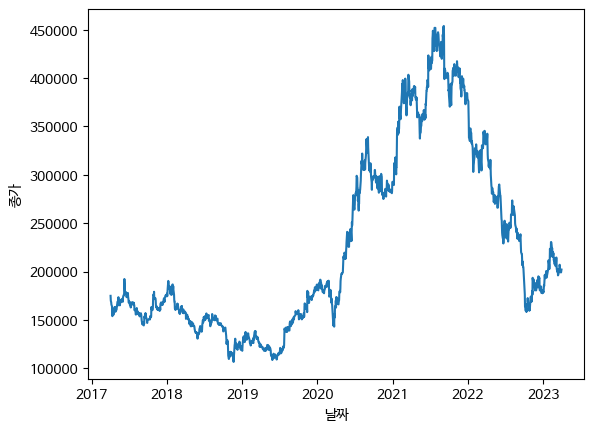

In [90]:
import seaborn as sns
sns.lineplot(x=df.index,y=df['종가'])

<Axes: xlabel='종가', ylabel='거래량'>

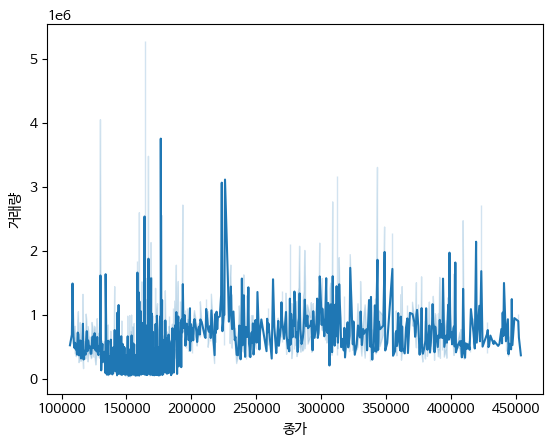

In [97]:
sns.lineplot(x=df['종가'],y=df['거래량'])

In [83]:
import plotly.express as px
df1 = df[['종가', 'ma5', 'ma20', 'ma100']]
fig = px.line(df1,  y=df1.columns,
              title='이동평균선')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [91]:
# 중복값확인
df.duplicated().sum()

0

In [93]:
# 결측치 확인
df.isna().sum()

시가        0
고가        0
저가        0
종가        0
거래량       0
거래대금      0
등락률       0
ma5       4
ma20     19
ma100    99
dtype: int64

In [ ]:
len(set(df_tic['ticker'].unique())-set(df_ind['ticker'].unique()))

124

In [ ]:
# ticker(주식번호) 와 인덱스(종목구분) 
df_ind_tic=pd.merge(df_ind, df_tic, on='ticker', how = 'left' )
df_ind_tic.tail()

,tic_index,tic_index_name,ticker,tic_name
5040,1894,코스피 200 TOP 10,006400,삼성SDI
5041,1894,코스피 200 TOP 10,005380,현대차
5042,1894,코스피 200 TOP 10,000270,기아
5043,1894,코스피 200 TOP 10,035420,NAVER
5044,1894,코스피 200 TOP 10,035720,카카오


In [ ]:
# df_ind_tic[df_ind_tic['tic_name']=='국민은행']

,tic_index,tic_index_name,ticker,tic_name


In [ ]:
# ticker(주식번호) 와 인덱스(종목구분) 와 종목명 중 업종 구분만
df_ind_tic1=df_ind_tic[df_ind_tic['tic_index_name'].str.startswith('코스피') == False]
# df_ind_tic[df_ind_tic['tic_index_name'].str.startswith('코스피') == False]['tic_index_name'].unique()
df_ind_tic1['tic_index_name'].unique()

array(['음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계', '전기전자',
       '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업', '금융업', '증권',
       '보험', '서비스업', '제조업'], dtype=object)

In [ ]:
df_ind_tic1.duplicated('tic_name').sum()
# 한 주식 종목이 여러업종으로 구분되어 있음

500

In [ ]:
df_ind_tic2=df_ind_tic[df_ind_tic['tic_index_name'] == '금융업']
# df_ind_tic3=df_ind_tic[df_ind_tic['tic_index_name'] == '코스피 100']
df_ind_tic2

,tic_index,tic_index_name,ticker,tic_name
2248,1021,금융업,105560,KB금융
2249,1021,금융업,055550,신한지주
2250,1021,금융업,003550,LG
2251,1021,금융업,034730,SK
2252,1021,금융업,032830,삼성생명
...,...,...,...,...
2343,1021,금융업,005740,크라운해태홀딩스
2344,1021,금융업,000590,CS홀딩스
2345,1021,금융업,044820,코스맥스비티아이
2346,1021,금융업,001290,상상인증권


In [ ]:
df_ind_tic2[df_ind_tic2['tic_name'].str.count('KB') > 0]

,tic_index,tic_index_name,ticker,tic_name
2248,1021,금융업,105560,KB금융


In [ ]:
ticker='105560'
df = stock.get_market_trading_value_by_date(start_date, end_date, ticker)
df.head()

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2023-01-02,-6471793550,13351550,4077752600,2380689400,0
2023-01-03,-6471784900,97611500,-2385665100,8759838500,0
2023-01-04,4771394250,296267350,-7276349450,2208687850,0
2023-01-05,17226125600,-794240000,-46451403500,30019517900,0
2023-01-06,23368079100,-1038555500,-67890820900,45561297300,0


In [ ]:
df = stock.get_market_trading_value_by_investor(start_date, end_date, ticker)
df.head()

,매도,매수,순매수
투자자구분,,,
금융투자,526193192300,478340109700,-47853082600
보험,49879174850,44040288200,-5838886650
투신,119642647900,113201865900,-6440782000
사모,112051418000,85321427800,-26729990200
은행,1543085200,11260756050,9717670850


In [ ]:
df = stock.get_market_fundamental(start_date, end_date, ticker)
df

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-01-02,121808,4.28,0.39,11134,6.18,2940
2023-01-03,121808,4.41,0.40,11134,5.99,2940
2023-01-04,121808,4.54,0.41,11134,5.82,2940
2023-01-05,121808,4.84,0.44,11134,5.45,2940
2023-01-06,121808,5.09,0.47,11134,5.19,2940
...,...,...,...,...,...,...
2023-04-05,121808,4.30,0.39,11134,6.14,2940
2023-04-06,121808,4.19,0.38,11134,6.30,2940
2023-04-07,121808,4.22,0.39,11134,6.26,2940
